# CSE422 Artificial Intelligence
###Regression

This weel we'll study various regression tecniques in ML. Before starting, let's get accustomed to a cool little library named sympy because we'll need this throughout the entire lab.

Sympy is a library which can be used to easily create mathematical expressions and do operations on them. Let's consider the follwing mathematical expression,

$$ \frac{1}{2N} (y - (mx + b))^2 $$

See how the expression can be created with sympy

In [1]:
import sympy as sp #importing sympy

# Dedining a set of mathematical symbols
vars = sp.symbols('x y m b N')
x,y,m,b,N = vars

#creating the expression
expr = ((1/(2*N)) * ((y - (m*x+b))**2))

We can use the display() function to visualize expressions

In [2]:
display(expr)

(-b - m*x + y)**2/(2*N)

There are multiple unknows in the expression. We can substitude the unknows with numeric values in dictonary format. In the format, we pass the variable name as key and the corresponding numeric form as the value. We use the subs() function for substitution

In [3]:
display(expr.subs({N:1, b:4, m:5}))

(-5*x + y - 4)**2/2

Substituting all the variables

In [4]:
print(expr.subs({N:1, y:2, x:3, b:4, m:5}))

289/2


With sympy, it is possible to differentiate any expression with respect to an unknown. Consider the following equation again,

$$ f = \frac{1}{2N} (y - (mx + b))^2 $$

The partial derivative with respect to $b$ will be,
$$ \frac{\partial f}{\partial b} = \frac{1}{N}(b+mx-y)$$

Let's calculate the partial derivative with sympy

In [5]:
diff = sp.diff(expr, b)  #differentiating with respect to b
display(diff)

(2*b + 2*m*x - 2*y)/(2*N)

Using the simplify() function from sympy to get the final result

In [6]:
display(diff.simplify())

(b + m*x - y)/N

Similarly, calculating the partial derivative with respect to m,

$$ \frac{\partial f_1}{\partial m} = \frac{1}{N}(-x*(y-mx-b))$$



In [7]:
display(sp.diff(expr, m))

-x*(-b - m*x + y)/N

This is everything we need to know about sympy for this lab. Let's jump into regression.

In simple words, regression is a machine learning technique through which we try to fit an equation to a set of data points. The data points can be in N-dimensional space. For simplicity of visualization, we'll only work with 2d data points for now. Let's create a set of 50 data points $(X_i,Y_i)$ where $X$ is a value between 0 to 100 and $Y = .5X + 3 + \delta$ where, $\delta$ is a random value between -10 to 10

In [8]:
import numpy as np


X = np.linspace(0, 100, 50)  #generating 50 X between 0 to 100 with uniform difference between each valie
delta = np.random.uniform(-10, 10, X.size) # generating randon delta
Y = 0.5*X + 3 + delta #calculating Y


Let's plot the data!

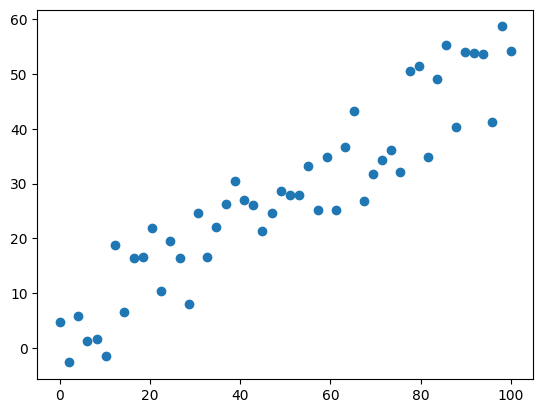

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)

If we take a look at the plot. It becomes intuitively clear that a straight line can somewhat fit this set of data. the equation of a 2 dimensional straight line is,
$$y = mx + b$$

We know the values of $x$ and $y$, how do we calculate $m$ and $b$?

The trick is to randomly choose values for $m$ and $b$ at ftrst and calculate $y$ for them. Obviously, this will produce some error. We calculate the amount of error using an error function which is,

$$e(m,b) = \frac{1}{2N}((Y - (mX + b))^2)$$
or,
$$e(m,b) = \frac{1}{2N}((Y - y)^2)$$

Where, Y is the actual value and $mX+b$ or $y$ is the predicted value with the randomly generated $m$ and $b$

Once we generate the initial $m$ and $b$, then we need to find the correct $m$ and $b$ using an iteative way. In order to do that, we calculate the gradient of the error function. The gradients of the error function are the partial derivative of the error function with respect to all the unknowns. There are two unknowns in our error function, Namely $m$ and $b$. So, the partial derivatives are,

$$ \frac{\partial e(m,b)}{\partial b} = \frac{1}{N}(b+mx-y)$$
$$ \frac{\partial e(m,b)}{\partial m} = \frac{1}{N}(-x*(y-mx-b))$$

Once we figure out the derivatives, we calculate the gradient using all the data points,

$$gradient_b = \frac{1}{N} \sum_{n=1}^{N} (b+mx_n-y_n)$$
$$gradient_m = \frac{1}{N} \sum_{n=1}^{N} (-x_n*(y_n-mx_n-b))$$

Finally, we do,

$$m = m - \alpha * gradient_m$$
$$b = b - \alpha * gradient_b$$

Here, $\alpha$ is a learning rate that is used to control the speed of correction. Choosing a very big $\alpha$ in gradient descent may cause divergent and choosing a very small $\alpha$ will make the learning process really slow.

We keep on repeating this process to find the optimal $m$ and $b$ and the error gets reduced. After sufficient amount of iterations, we should find the $m$ and $b$ that optimally fits the data points

In [10]:
def gradient_descent(b_val, m_val, x_val, y_val, learning_rate, num_iterations):


    # Defining the error function
    vars = sp.symbols('x y m b n')
    x, y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((y - (m*x+b))**2))

    #calculating the partial derivatives
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)

    # repeat for num_iterations
    for j in range(num_iterations):
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            b_gradient += error_function_b.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})
            m_gradient += error_function_m.subs({x:x_val[i], y: y_val[i], m:m_val, b:b_val, n:n_val})

        #update the value for b and m
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)

    return [b_val, m_val]

Inntially when $m$ and $b$ is initialized. Obviously, the plotted line is nowhere near the data points

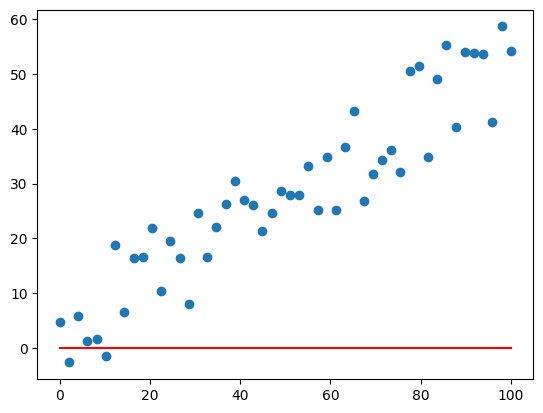

In [11]:
m_val = 0
b_val = 0

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

After 2 iterations, better... but not enough!

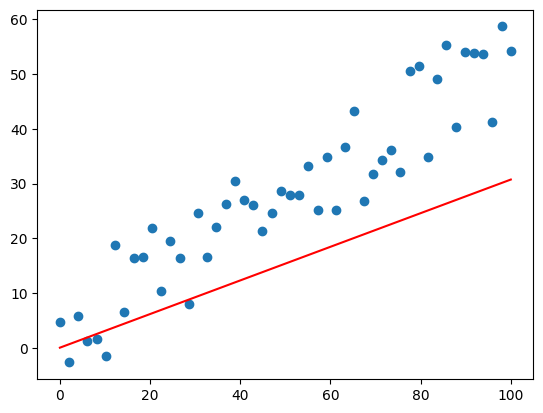

In [12]:
vals = gradient_descent(0, 0, X, Y, .0001, 2)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

After, 5 iterations... much better!

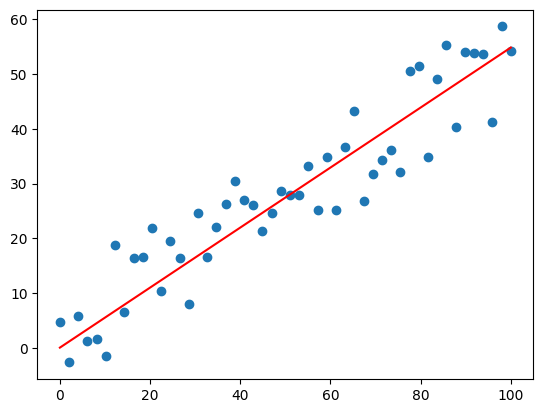

In [13]:
vals = gradient_descent(0, 0, X, Y, .0001, 100)
m_val = vals[1]
b_val = vals[0]
predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

Now, let's consider the following pattern of data points

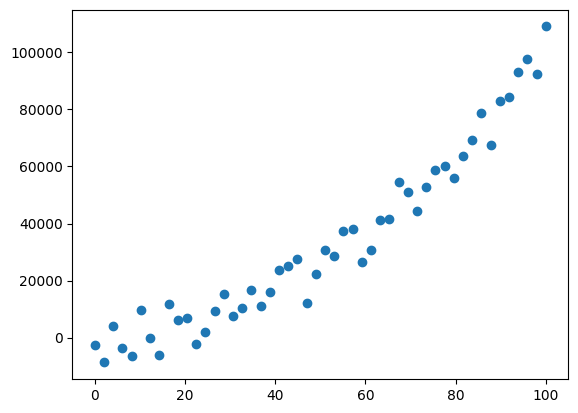

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 100, 50)
delta = np.random.uniform(-10000, 10000, X.size)
Y = 10*X**2 + 0.5*X + 3 + delta

plt.scatter(X, Y)

We can try to fit these data points with a linear function... but due to the nature of the pattern, a straight line will never fit this data extremely well.

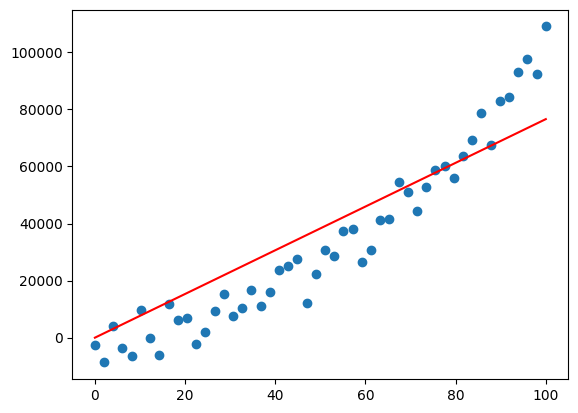

In [15]:
vals = gradient_descent(-5, 5, X, Y, .0001, 100)
m_val = vals[1]
b_val = vals[0]

predictions = [(m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

If we take a look at the plot. It should become clear that a degree-2 polynomial should fit the data well. The general equation of a degree-2 polynomial would be,
$$ax^2 + mx + b$$
As we need to calculate 3 varables here namely $a$, $m$ and $b$, there would be 3 partial derivatives and the gradient descend will be a little more complicated than before.

In [16]:
def gradient_descent_poly(b_val, m_val, a_val, x_val, y_val, learning_rate, num_iterations):

    # Define x and y as mathematical symbols
    vars = sp.symbols('x y m b n a')
    x, y,m,b,n, a = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((y - (a*(x**2) + m*x+b))**2))
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        a_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += sp.diff(error_function, b).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            m_gradient += sp.diff(error_function, m).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})
            a_gradient += sp.diff(error_function, a).subs({x:x_val[i], y: y_val[i], m:m_val, a: a_val, b:b_val, n:n_val})

        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        a_val -= (learning_rate * a_gradient)

    return [b_val, m_val, a_val]

Now if we calculate, we see that a degree-2 polynomial fits the data much better. Polynomial regression works well in places where linear regression do not perform well

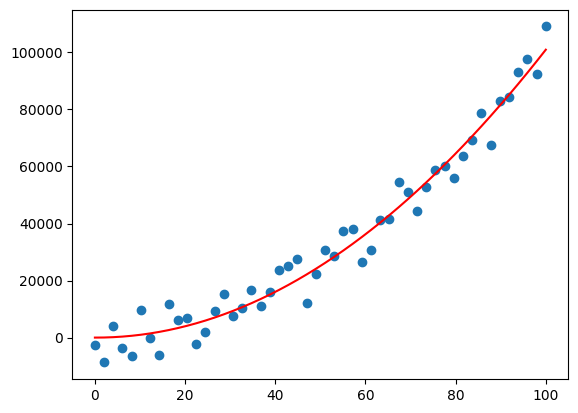

In [17]:
vals = gradient_descent_poly(-5, -5, -5, X, Y, .00000001, 30)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
predictions = [(a_val * X[i]*X[i]) + (m_val * X[i]) + b_val for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

We can also use regression in multidimensinal space. Let's consider 3d for now

C:\Users\22101621\AppData\Local\Temp\ipykernel_12944\533470786.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X, Y, Z, cmap='Greens');


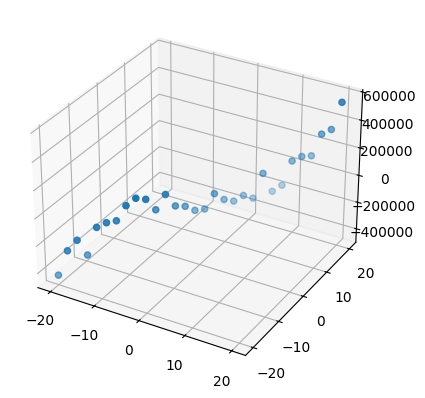

In [18]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.linspace(-20, 20, 30)
Y = np.linspace(-20, 20, 30)
delta = np.random.uniform(-100000, 100000, X.size)
Z = 5* X**3 + 18*Y**2 + 2*Y + 50* Y**3 + 4*X +30 + delta
ax.scatter3D(X, Y, Z, cmap='Greens');

In [19]:
def gradient_descent_poly_degree_three(b_val, m_val, a_val, c_val, d_val, e_val, x_val, y_val, z_val, learning_rate, num_iterations):

    # Define x and y as mathematical symbols
    vars = sp.symbols('x y z m b n a c d e')
    x, y,z , m,b,n, a, c, d, e = vars
    n_val = float(len(x_val))
    error_function = ((1/(2*n)) * ((z - (a*x**3 + c*y**2 + d*x + e*y**3 + m*x+b))**2))
    err_func_b  = sp.diff(error_function, b)
    err_func_m  = sp.diff(error_function, m)
    err_func_a  = sp.diff(error_function, a)
    err_func_c  = sp.diff(error_function, c)
    err_func_d  = sp.diff(error_function, d)
    err_func_e  = sp.diff(error_function, e)
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        a_gradient = 0
        c_gradient = 0
        d_gradient = 0
        e_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += err_func_b.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            m_gradient += err_func_m.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            a_gradient += err_func_a.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            c_gradient += err_func_c.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            d_gradient += err_func_d.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})
            e_gradient += err_func_e.subs({x:x_val[i], y: y_val[i], z:z_val[i], m:m_val, a: a_val, b:b_val, n:n_val, c:c_val, d:d_val, e:e_val})

        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)
        a_val -= (learning_rate * a_gradient)
        c_val -= (learning_rate * c_gradient)
        d_val -= (learning_rate * d_gradient)
        e_val -= (learning_rate * e_gradient)

    return [b_val, m_val, a_val, c_val, d_val, e_val]

Take a look at the regression below, works fairely well.

We can do it even at a higher dimension. But for obvious reasons, we cannot visualize over 3d.

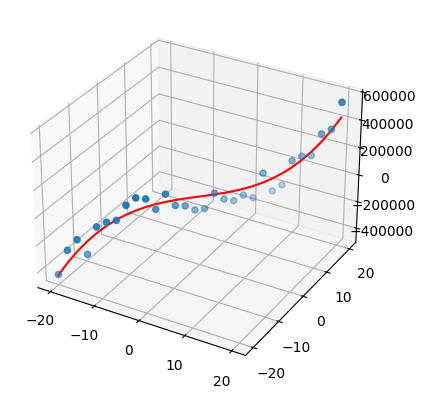

In [20]:
vals = gradient_descent_poly_degree_three(0, 0, 0, 0,0,0, X, Y, Z, .00000001, 50)
m_val = vals[1]
b_val = vals[0]
a_val = vals[2]
c_val = vals[3]
d_val = vals[4]
e_val = vals[5]

predictions = [a_val * X[i]**3 + c_val * Y[i]**2 + d_val * Y[i] + e_val * Y[i]**3 + m_val * X[i] + b_val for i in range(len(X))]
ax = plt.axes(projection='3d')

ax.scatter3D(X, Y,Z)
ax.plot3D(X, Y, predictions, color='r')

Now that we are done with regression, what about classification task? In a binary classification task, all the points are either labelled as 0s or 1s. Let's consider the follwing points  where $Y = 0$ for $x<50$ and $Y = 1$ for $X>50$

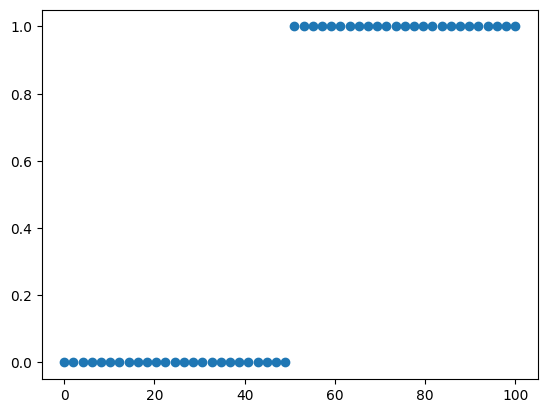

In [21]:
X = np.linspace(0, 100, 50)
Y = np.zeros(X.size)
Y[25:50] = 1
plt.scatter(X, Y)

Obviously, we need a very specifically shaped line to fit this. In order to convert out linear line to this specific shape, we use a function called sigmoid function. The sigmoid function is,
$$ \sigma(z) = \frac{1}{1+ e^{-z}}$$
Where $z = mx + b$, or, our linear equation.

The process of gradient descent in logistic regression is almost the same as the linear regression. However, in the logistic regression, the cost function looks a little different. We use an entrpy based cost function in logistic regression

$$e(m,b) = -\frac{1}{n} y \log(\sigma(z)) + (1-y) \log(1-\sigma(z))$$

If we break this cost function down, we get,

$$e(m,b) = -\frac{1}{n} y \log(\frac{1}{1+ e^{-(mx+b)}}) + (1-y) \log(1-\frac{1}{1+ e^{-(mx+b)}})$$

The rest of the procedure is exactly the same.

In [22]:
def gradient_descent_logistic(b_val, m_val, x_val, y_val, learning_rate, num_iterations):


    # Defining the error function or the cost function
    vars = sp.symbols('x y m b n')
    x, y,m,b,n = vars
    n_val = float(len(x_val))
    error_function = -(1/(n)) * ((y * sp.log(1/ (1+(sp.exp(-(m*x+b)))))) + ((1-y) * sp.log(1 - (1/ (1+(sp.exp(-(m*x+b))))))))

    #calculatin partial derivative
    error_function_b = sp.diff(error_function, b)
    error_function_m = sp.diff(error_function, m)
    for j in range(num_iterations): # repeat for num_iterations
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x_val)):
            #print(b)
            b_gradient += error_function_b.evalf(subs = {x:x_val[i], y:y_val[i], m:m_val, b:b_val,n:n_val})
            m_gradient += error_function_m.evalf(subs = {x:x_val[i], y:y_val[i], m:m_val, b:b_val,n:n_val})

        #correcting b and m in an ierative way
        b_val -= (learning_rate * b_gradient)
        m_val -= (learning_rate * m_gradient)


    return [b_val, m_val]

Let's see how this fits our data

0.201975213871323 -9.93395961008243


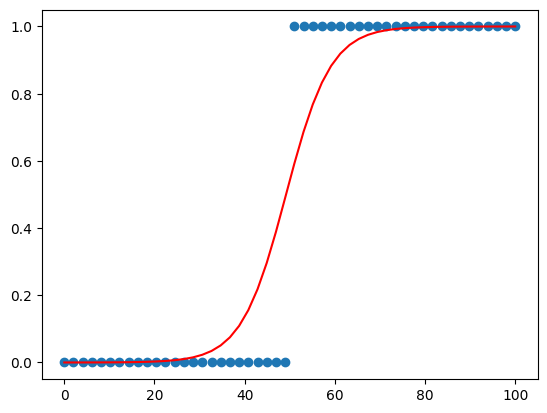

In [23]:
import math
vals = gradient_descent_logistic(-10, -5, X, Y, .01, 40)
m_val = vals[1]
b_val = vals[0]
print(m_val, b_val)
predictions = [1/(1+math.exp(-((m_val * X[i]) + b_val))) for i in range(len(X))]
plt.scatter(X, Y)
plt.plot(X, predictions, color='r')

Our implementation of regression is slow and a little clunky. However, it should help us to understand the underlying concept of regression in machine learning.

With the sklearn library of python, we can implement regression with just few lines of code. Implementation with sklearn will also be a lot faster since their internal code is heavily optimized.

First, let's load a dataset using pandas and see the dataset.

In [24]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/salaryData.csv')
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/salaryData.csv'

Seperating $x$ and $y$ (features and labels)

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

Importing linear regression from sklearn library and fitting the data.

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 0)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(xTrain, yTrain)
yPrediction = clf.predict(xTest)
yPrediction

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

Plotting the fitted line

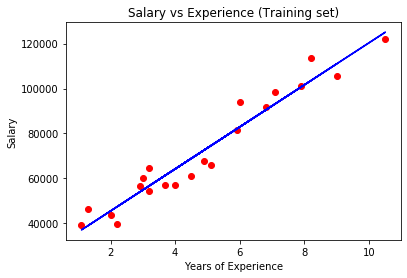

In [ ]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, clf.predict(xTrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [1]:
# Import the dependencies for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Loading iris dataset

In [2]:
#Load the data set
data = sns.load_dataset("iris")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Seperating features and labes

In [3]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [4]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [6]:
print( accuracy_score(y_test, predictions))

1.0
